# <p style="padding:10px;background-color:#008800;margin:0;color:white;font-family:newtimeroman;font-size:150%;text-align:center;border-radius: 10px;overflow:hidden;font-weight:700"> Predict CO2 Emissions in Rwanda: Playground Series</p> 

### Import Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge
from sklearn import svm
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn import metrics
import pickle

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


### EDA

In [2]:
df = pd.read_csv("/kaggle/input/playground-series-s3e20/train.csv")
print(df.columns.tolist())
print(df.isnull().sum())
print(df.isnull().sum().sum())
print(print(df.shape))
df.head()

['ID_LAT_LON_YEAR_WEEK', 'latitude', 'longitude', 'year', 'week_no', 'SulphurDioxide_SO2_column_number_density', 'SulphurDioxide_SO2_column_number_density_amf', 'SulphurDioxide_SO2_slant_column_number_density', 'SulphurDioxide_cloud_fraction', 'SulphurDioxide_sensor_azimuth_angle', 'SulphurDioxide_sensor_zenith_angle', 'SulphurDioxide_solar_azimuth_angle', 'SulphurDioxide_solar_zenith_angle', 'SulphurDioxide_SO2_column_number_density_15km', 'CarbonMonoxide_CO_column_number_density', 'CarbonMonoxide_H2O_column_number_density', 'CarbonMonoxide_cloud_height', 'CarbonMonoxide_sensor_altitude', 'CarbonMonoxide_sensor_azimuth_angle', 'CarbonMonoxide_sensor_zenith_angle', 'CarbonMonoxide_solar_azimuth_angle', 'CarbonMonoxide_solar_zenith_angle', 'NitrogenDioxide_NO2_column_number_density', 'NitrogenDioxide_tropospheric_NO2_column_number_density', 'NitrogenDioxide_stratospheric_NO2_column_number_density', 'NitrogenDioxide_NO2_slant_column_number_density', 'NitrogenDioxide_tropopause_pressure',

,ID_LAT_LON_YEAR_WEEK,latitude,longitude,year,week_no,SulphurDioxide_SO2_column_number_density,SulphurDioxide_SO2_column_number_density_amf,SulphurDioxide_SO2_slant_column_number_density,SulphurDioxide_cloud_fraction,SulphurDioxide_sensor_azimuth_angle,...,Cloud_cloud_top_height,Cloud_cloud_base_pressure,Cloud_cloud_base_height,Cloud_cloud_optical_depth,Cloud_surface_albedo,Cloud_sensor_azimuth_angle,Cloud_sensor_zenith_angle,Cloud_solar_azimuth_angle,Cloud_solar_zenith_angle,emission
0,ID_-0.510_29.290_2019_00,-0.51,29.29,2019,0,-0.000108,0.603019,-0.000065,0.255668,-98.593887,...,3664.436218,61085.809570,2615.120483,15.568533,0.272292,-12.628986,35.632416,-138.786423,30.752140,3.750994
1,ID_-0.510_29.290_2019_01,-0.51,29.29,2019,1,0.000021,0.728214,0.000014,0.130988,16.592861,...,3651.190311,66969.478735,3174.572424,8.690601,0.256830,30.359375,39.557633,-145.183930,27.251779,4.025176
2,ID_-0.510_29.290_2019_02,-0.51,29.29,2019,2,0.000514,0.748199,0.000385,0.110018,72.795837,...,4216.986492,60068.894448,3516.282669,21.103410,0.251101,15.377883,30.401823,-142.519545,26.193296,4.231381
3,ID_-0.510_29.290_2019_03,-0.51,29.29,2019,3,NaN,NaN,NaN,NaN,NaN,...,5228.507736,51064.547339,4180.973322,15.386899,0.262043,-11.293399,24.380357,-132.665828,28.829155,4.305286
4,ID_-0.510_29.290_2019_04,-0.51,29.29,2019,4,-0.000079,0.676296,-0.000048,0.121164,4.121269,...,3980.598120,63751.125781,3355.710107,8.114694,0.235847,38.532263,37.392979,-141.509805,22.204612,4.347317


In [3]:
test = pd.read_csv("/kaggle/input/playground-series-s3e20/test.csv")
print(test.columns.tolist())
print(test.shape)
test.head()

['ID_LAT_LON_YEAR_WEEK', 'latitude', 'longitude', 'year', 'week_no', 'SulphurDioxide_SO2_column_number_density', 'SulphurDioxide_SO2_column_number_density_amf', 'SulphurDioxide_SO2_slant_column_number_density', 'SulphurDioxide_cloud_fraction', 'SulphurDioxide_sensor_azimuth_angle', 'SulphurDioxide_sensor_zenith_angle', 'SulphurDioxide_solar_azimuth_angle', 'SulphurDioxide_solar_zenith_angle', 'SulphurDioxide_SO2_column_number_density_15km', 'CarbonMonoxide_CO_column_number_density', 'CarbonMonoxide_H2O_column_number_density', 'CarbonMonoxide_cloud_height', 'CarbonMonoxide_sensor_altitude', 'CarbonMonoxide_sensor_azimuth_angle', 'CarbonMonoxide_sensor_zenith_angle', 'CarbonMonoxide_solar_azimuth_angle', 'CarbonMonoxide_solar_zenith_angle', 'NitrogenDioxide_NO2_column_number_density', 'NitrogenDioxide_tropospheric_NO2_column_number_density', 'NitrogenDioxide_stratospheric_NO2_column_number_density', 'NitrogenDioxide_NO2_slant_column_number_density', 'NitrogenDioxide_tropopause_pressure',

,ID_LAT_LON_YEAR_WEEK,latitude,longitude,year,week_no,SulphurDioxide_SO2_column_number_density,SulphurDioxide_SO2_column_number_density_amf,SulphurDioxide_SO2_slant_column_number_density,SulphurDioxide_cloud_fraction,SulphurDioxide_sensor_azimuth_angle,...,Cloud_cloud_top_pressure,Cloud_cloud_top_height,Cloud_cloud_base_pressure,Cloud_cloud_base_height,Cloud_cloud_optical_depth,Cloud_surface_albedo,Cloud_sensor_azimuth_angle,Cloud_sensor_zenith_angle,Cloud_solar_azimuth_angle,Cloud_solar_zenith_angle
0,ID_-0.510_29.290_2022_00,-0.51,29.29,2022,0,NaN,NaN,NaN,NaN,NaN,...,36022.027344,8472.313477,41047.937500,7472.313477,7.935617,0.240773,-100.113792,33.697044,-133.047546,33.779583
1,ID_-0.510_29.290_2022_01,-0.51,29.29,2022,1,0.000456,0.691164,0.000316,0.000000,76.239196,...,48539.737242,6476.147323,54915.708579,5476.147161,11.448437,0.293119,-30.510319,42.402593,-138.632822,31.012380
2,ID_-0.510_29.290_2022_02,-0.51,29.29,2022,2,0.000161,0.605107,0.000106,0.079870,-42.055341,...,34133.080469,8984.795703,39006.093750,7984.795703,10.753179,0.267130,39.087361,45.936480,-144.784988,26.743361
3,ID_-0.510_29.290_2022_03,-0.51,29.29,2022,3,0.000350,0.696917,0.000243,0.201028,72.169566,...,50854.991076,6014.724059,57646.368368,5014.724115,11.764556,0.304679,-24.465127,42.140419,-135.027891,29.604774
4,ID_-0.510_29.290_2022_04,-0.51,29.29,2022,4,-0.000317,0.580527,-0.000184,0.204352,76.190865,...,46594.685145,6849.280477,52896.541873,5849.280394,13.065317,0.284221,-12.907850,30.122641,-135.500119,26.276807


In [4]:
sample_submission = pd.read_csv("/kaggle/input/playground-series-s3e20/sample_submission.csv")
print(sample_submission.describe())
print(sample_submission.shape)
sample_submission.head()

           emission
count  2.435300e+04
mean   8.194000e+01
std    2.842229e-14
min    8.194000e+01
25%    8.194000e+01
50%    8.194000e+01
75%    8.194000e+01
max    8.194000e+01
(24353, 2)


,ID_LAT_LON_YEAR_WEEK,emission
0,ID_-0.510_29.290_2022_00,81.94
1,ID_-0.510_29.290_2022_01,81.94
2,ID_-0.510_29.290_2022_02,81.94
3,ID_-0.510_29.290_2022_03,81.94
4,ID_-0.510_29.290_2022_04,81.94


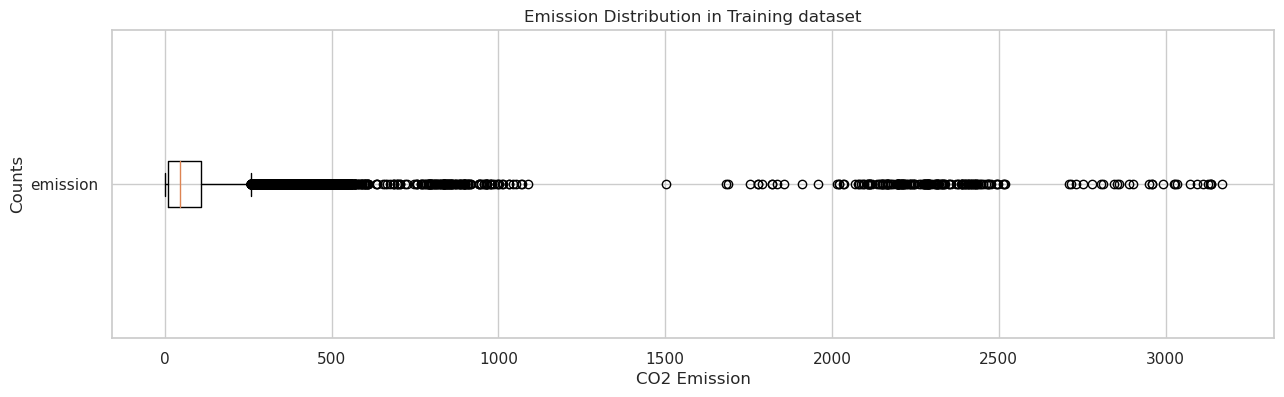

In [5]:
# Set seaborn style
sns.set(style='whitegrid')

# Plot the column distribution
plt.figure(figsize=(15, 4))
# plt.scatter(range(len(df['emission'])), df['emission'], color='blue', marker='.')
plt.boxplot(df['emission'], vert=False, labels=['emission'])

# Add labels and title
plt.xlabel('CO2 Emission')
plt.ylabel('Counts')
plt.title('Emission Distribution in Training dataset')

# Show the plot
plt.show()

In [6]:
df.drop(['ID_LAT_LON_YEAR_WEEK'], axis = 1, inplace = True)
print(df.shape)
print(df.columns.tolist())

(79023, 75)
['latitude', 'longitude', 'year', 'week_no', 'SulphurDioxide_SO2_column_number_density', 'SulphurDioxide_SO2_column_number_density_amf', 'SulphurDioxide_SO2_slant_column_number_density', 'SulphurDioxide_cloud_fraction', 'SulphurDioxide_sensor_azimuth_angle', 'SulphurDioxide_sensor_zenith_angle', 'SulphurDioxide_solar_azimuth_angle', 'SulphurDioxide_solar_zenith_angle', 'SulphurDioxide_SO2_column_number_density_15km', 'CarbonMonoxide_CO_column_number_density', 'CarbonMonoxide_H2O_column_number_density', 'CarbonMonoxide_cloud_height', 'CarbonMonoxide_sensor_altitude', 'CarbonMonoxide_sensor_azimuth_angle', 'CarbonMonoxide_sensor_zenith_angle', 'CarbonMonoxide_solar_azimuth_angle', 'CarbonMonoxide_solar_zenith_angle', 'NitrogenDioxide_NO2_column_number_density', 'NitrogenDioxide_tropospheric_NO2_column_number_density', 'NitrogenDioxide_stratospheric_NO2_column_number_density', 'NitrogenDioxide_NO2_slant_column_number_density', 'NitrogenDioxide_tropopause_pressure', 'NitrogenDi

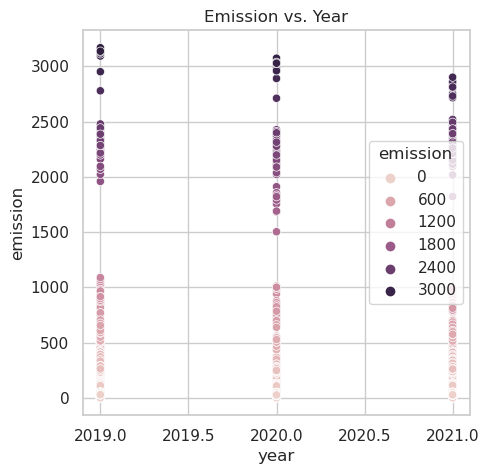

In [7]:
# sns.heatmap(df.corr(),annot=True,cmap="Blues")
plt.figure(figsize = (5,5))
sns.scatterplot(x = df['year'],y=df['emission'],data=df,hue= df['emission'])
plt.title('Emission vs. Year')
plt.show()

In [8]:
df.drop(['year'], axis = 1, inplace = True)
print(df.shape)
print(df.columns.tolist())

(79023, 74)
['latitude', 'longitude', 'week_no', 'SulphurDioxide_SO2_column_number_density', 'SulphurDioxide_SO2_column_number_density_amf', 'SulphurDioxide_SO2_slant_column_number_density', 'SulphurDioxide_cloud_fraction', 'SulphurDioxide_sensor_azimuth_angle', 'SulphurDioxide_sensor_zenith_angle', 'SulphurDioxide_solar_azimuth_angle', 'SulphurDioxide_solar_zenith_angle', 'SulphurDioxide_SO2_column_number_density_15km', 'CarbonMonoxide_CO_column_number_density', 'CarbonMonoxide_H2O_column_number_density', 'CarbonMonoxide_cloud_height', 'CarbonMonoxide_sensor_altitude', 'CarbonMonoxide_sensor_azimuth_angle', 'CarbonMonoxide_sensor_zenith_angle', 'CarbonMonoxide_solar_azimuth_angle', 'CarbonMonoxide_solar_zenith_angle', 'NitrogenDioxide_NO2_column_number_density', 'NitrogenDioxide_tropospheric_NO2_column_number_density', 'NitrogenDioxide_stratospheric_NO2_column_number_density', 'NitrogenDioxide_NO2_slant_column_number_density', 'NitrogenDioxide_tropopause_pressure', 'NitrogenDioxide_ab

In [9]:
df_dat = df.drop(['emission'], axis = 1)
print(df.shape)
print(df.columns.tolist())

(79023, 74)
['latitude', 'longitude', 'week_no', 'SulphurDioxide_SO2_column_number_density', 'SulphurDioxide_SO2_column_number_density_amf', 'SulphurDioxide_SO2_slant_column_number_density', 'SulphurDioxide_cloud_fraction', 'SulphurDioxide_sensor_azimuth_angle', 'SulphurDioxide_sensor_zenith_angle', 'SulphurDioxide_solar_azimuth_angle', 'SulphurDioxide_solar_zenith_angle', 'SulphurDioxide_SO2_column_number_density_15km', 'CarbonMonoxide_CO_column_number_density', 'CarbonMonoxide_H2O_column_number_density', 'CarbonMonoxide_cloud_height', 'CarbonMonoxide_sensor_altitude', 'CarbonMonoxide_sensor_azimuth_angle', 'CarbonMonoxide_sensor_zenith_angle', 'CarbonMonoxide_solar_azimuth_angle', 'CarbonMonoxide_solar_zenith_angle', 'NitrogenDioxide_NO2_column_number_density', 'NitrogenDioxide_tropospheric_NO2_column_number_density', 'NitrogenDioxide_stratospheric_NO2_column_number_density', 'NitrogenDioxide_NO2_slant_column_number_density', 'NitrogenDioxide_tropopause_pressure', 'NitrogenDioxide_ab

In [10]:
# Fill NaN values with the most frequent value in each column
# df_mode_filled = df_dat.fillna(df_dat.mode().iloc[0])
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean')  # 'median', 'most_frequent', or 'constant' 
imputed_data = imputer.fit_transform(df_dat)
import pandas as pd
# Convert the imputed data (NumPy array) back to a DataFrame
imputed_df = pd.DataFrame(imputed_data, columns=df_dat.columns)
df_mode_filled = imputed_df
df_mode_filled.head()

,latitude,longitude,week_no,SulphurDioxide_SO2_column_number_density,SulphurDioxide_SO2_column_number_density_amf,SulphurDioxide_SO2_slant_column_number_density,SulphurDioxide_cloud_fraction,SulphurDioxide_sensor_azimuth_angle,SulphurDioxide_sensor_zenith_angle,SulphurDioxide_solar_azimuth_angle,...,Cloud_cloud_top_pressure,Cloud_cloud_top_height,Cloud_cloud_base_pressure,Cloud_cloud_base_height,Cloud_cloud_optical_depth,Cloud_surface_albedo,Cloud_sensor_azimuth_angle,Cloud_sensor_zenith_angle,Cloud_solar_azimuth_angle,Cloud_solar_zenith_angle
0,-0.51,29.29,0.0,-0.000108,0.603019,-0.000065,0.255668,-98.593887,50.843559,-130.050797,...,53534.732422,3664.436218,61085.809570,2615.120483,15.568533,0.272292,-12.628986,35.632416,-138.786423,30.752140
1,-0.51,29.29,1.0,0.000021,0.728214,0.000014,0.130988,16.592861,39.137194,-140.874435,...,63790.296241,3651.190311,66969.478735,3174.572424,8.690601,0.256830,30.359375,39.557633,-145.183930,27.251779
2,-0.51,29.29,2.0,0.000514,0.748199,0.000385,0.110018,72.795837,52.868816,-150.191757,...,55923.790554,4216.986492,60068.894448,3516.282669,21.103410,0.251101,15.377883,30.401823,-142.519545,26.193296
3,-0.51,29.29,3.0,0.000048,0.834848,0.000035,0.158418,-7.925870,37.436189,-83.833174,...,44569.130636,5228.507736,51064.547339,4180.973322,15.386899,0.262043,-11.293399,24.380357,-132.665828,28.829155
4,-0.51,29.29,4.0,-0.000079,0.676296,-0.000048,0.121164,4.121269,35.515587,-137.409159,...,59904.314844,3980.598120,63751.125781,3355.710107,8.114694,0.235847,38.532263,37.392979,-141.509805,22.204612


In [11]:
# Normalize the copy using StandardScaler
scaler = StandardScaler()
df_mode_filled[df_mode_filled.columns] = scaler.fit_transform(df_mode_filled)
df_norm = df_mode_filled
df_norm.head()

,latitude,longitude,week_no,SulphurDioxide_SO2_column_number_density,SulphurDioxide_SO2_column_number_density_amf,SulphurDioxide_SO2_slant_column_number_density,SulphurDioxide_cloud_fraction,SulphurDioxide_sensor_azimuth_angle,SulphurDioxide_sensor_zenith_angle,SulphurDioxide_solar_azimuth_angle,...,Cloud_cloud_top_pressure,Cloud_cloud_top_height,Cloud_cloud_base_pressure,Cloud_cloud_base_height,Cloud_cloud_optical_depth,Cloud_surface_albedo,Cloud_sensor_azimuth_angle,Cloud_sensor_zenith_angle,Cloud_solar_azimuth_angle,Cloud_solar_zenith_angle
0,1.988534,-0.728253,-1.699673,-0.636087,-1.385127,-5.408036e-01,1.509398e+00,-1.562718e+00,1.049491,-1.343476,...,0.051191,-1.353784,0.184578,-1.516751,-0.264391,0.016880,-0.060901,-0.749722,-1.378168,0.643728
1,1.988534,-0.728253,-1.634301,-0.111382,-0.637117,-1.155010e-01,-4.257198e-01,4.225951e-01,0.133150,-1.658103,...,1.223309,-1.363085,0.836628,-1.103894,-0.773663,-0.296853,1.358742,-0.137216,-1.547769,-0.153566
2,1.988534,-0.728253,-1.568929,1.898465,-0.517711,1.883664e+00,-7.511914e-01,1.391287e+00,1.208022,-1.928944,...,0.324238,-0.965788,0.071880,-0.851723,0.145436,-0.413105,0.863995,-1.565923,-1.477135,-0.394662
3,1.988534,-0.728253,-1.503557,0.000000,0.000000,-7.301527e-17,-4.307859e-16,-3.061658e-17,0.000000,0.000000,...,-0.973497,-0.255506,-0.926015,-0.361204,-0.277840,-0.191088,-0.016795,-2.505535,-1.215908,0.205720
4,1.988534,-0.728253,-1.438185,-0.515673,-0.947314,-4.454062e-01,-5.781988e-01,2.076397e-01,-0.150339,-1.557373,...,0.779177,-1.131778,0.479958,-0.970221,-0.816306,-0.722632,1.628642,-0.474997,-1.450366,-1.303184


In [12]:
X = df_norm
y = df['emission']
y.isnull().sum()

0

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

### Finding optimal parameters

In [14]:
model2 = XGBRegressor(learning_rate=0.1, max_depth=7, n_estimators=200)

### Model Evaluation

In [15]:
model = model2 
model.fit(X_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=7, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=200, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [16]:
y_pred = model.predict(X_test)

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Calculate metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("R-squared:", r2)

Mean Absolute Error: 12.0987074183194
Mean Squared Error: 636.0587509020976
R-squared: 0.9613403493685786


### Testing and Submission

In [17]:
test_dat = pd.read_csv("/kaggle/input/playground-series-s3e20/test.csv")
test_dat.drop(['ID_LAT_LON_YEAR_WEEK','year'], axis = 1, inplace = True)
# Fill NaN values with the most frequent value in each column
test_dat_mode_filled = test_dat.fillna(test_dat.mode().iloc[0])
print(test_dat_mode_filled.head())
# Normalize the copy using StandardScaler
scaler = StandardScaler()
test_dat_mode_filled[test_dat_mode_filled.columns] = scaler.fit_transform(test_dat_mode_filled)
test_dat_norm_val = test_dat_mode_filled
print(test_dat_norm_val.head())
predictions_emission = model.predict(test_dat_norm_val)

   latitude  longitude  week_no  SulphurDioxide_SO2_column_number_density  \
0     -0.51      29.29        0                                 -0.000977   
1     -0.51      29.29        1                                  0.000456   
2     -0.51      29.29        2                                  0.000161   
3     -0.51      29.29        3                                  0.000350   
4     -0.51      29.29        4                                 -0.000317   

   SulphurDioxide_SO2_column_number_density_amf  \
0                                      0.339845   
1                                      0.691164   
2                                      0.605107   
3                                      0.696917   
4                                      0.580527   

   SulphurDioxide_SO2_slant_column_number_density  \
0                                       -0.000775   
1                                        0.000316   
2                                        0.000106   
3                 

In [18]:
test_eng = pd.read_csv("/kaggle/input/playground-series-s3e20/test.csv")
print(test_eng.head())

       ID_LAT_LON_YEAR_WEEK  latitude  longitude  year  week_no  \
0  ID_-0.510_29.290_2022_00     -0.51      29.29  2022        0   
1  ID_-0.510_29.290_2022_01     -0.51      29.29  2022        1   
2  ID_-0.510_29.290_2022_02     -0.51      29.29  2022        2   
3  ID_-0.510_29.290_2022_03     -0.51      29.29  2022        3   
4  ID_-0.510_29.290_2022_04     -0.51      29.29  2022        4   

   SulphurDioxide_SO2_column_number_density  \
0                                       NaN   
1                                  0.000456   
2                                  0.000161   
3                                  0.000350   
4                                 -0.000317   

   SulphurDioxide_SO2_column_number_density_amf  \
0                                           NaN   
1                                      0.691164   
2                                      0.605107   
3                                      0.696917   
4                                      0.580527   

   Sulp

In [19]:
# Create a submission file
sub_file = pd.DataFrame({'ID_LAT_LON_YEAR_WEEK': test_eng['ID_LAT_LON_YEAR_WEEK'], 'emission': predictions_emission})
print(sub_file.head())
# Create file
sub_file.to_csv('BaselineSubmission.csv', index = False) # Download and submit, or submit via Notebook output

       ID_LAT_LON_YEAR_WEEK  emission
0  ID_-0.510_29.290_2022_00  4.006217
1  ID_-0.510_29.290_2022_01  4.722600
2  ID_-0.510_29.290_2022_02  4.102560
3  ID_-0.510_29.290_2022_03  3.673680
4  ID_-0.510_29.290_2022_04  4.346036
